In [1]:
import pandas as pd
import ipykernel
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats

from sklearn.linear_model import LinearRegression

In [2]:
# "mock-data" file generated from xls spreadsheets of actual data to be used after SQL db developement
df = pd.read_csv('rats_Garb_LU_ED_INC_POP_3.csv')
df.head()

,CD,total_rats,tons_of_refuge,tons_of_MGP,tons_of_paper,tons_res_organics,tons_sch_organics,tons_leaves_organics,tons_xmastrees,pct_LU1,...,pct_LU10,pct_LU11,BDorHigher,Associates,someCollege,HS,LessHS,Adults25nOlder,Under18,18to24
0,01 BRONX,2338,764007.8,32663.3,28960.3,141.5,NaN,15.6,148.7,6.1,...,4.2,4.8,0.10,0.06,0.16,0.28,0.40,0.58,0.29,0.12
1,02 BRONX,2027,582803.0,34424.3,24529.8,NaN,NaN,53.0,173.9,4.4,...,2.5,13.3,0.10,0.06,0.16,0.28,0.40,0.58,0.29,0.12
2,03 BRONX,2522,723072.8,34086.5,28189.1,NaN,NaN,16.5,91.3,10.3,...,3.5,2.2,0.12,0.06,0.18,0.28,0.36,0.56,0.30,0.13
3,04 BRONX,4158,1598950.4,78164.7,61554.6,343.0,NaN,NaN,269.4,4.3,...,6.3,4.2,0.14,0.07,0.17,0.28,0.35,0.60,0.29,0.11
4,05 BRONX,3365,1351276.7,88723.5,58439.9,21.3,NaN,11.9,202.6,11.3,...,2.1,4.7,0.12,0.07,0.17,0.29,0.35,0.58,0.30,0.12


In [3]:
#getting stats for rats

data = df.total_rats

# removing null values to avoid errors 
data.dropna(inplace = True) 
  
# percentile list
perc =[.25, .40, .60, .75]
  
# list of dtypes to include
include =['object', 'float', 'int']
  
# calling describe method
desc = data.describe(percentiles = perc, include = include)
  
# display
desc

count      59.000000
mean     2897.949153
std      1775.622945
min       522.000000
25%      1572.000000
40%      2160.400000
50%      2517.000000
60%      2970.400000
75%      3625.500000
max      9437.000000
Name: total_rats, dtype: float64

In [4]:
# columnList=['tons_of_MGP', 'tons_of_paper', 'tons_res_organics', 'tons_sch_organics', 'tons_leaves_organics',
#             'tons_xmastrees', 'pct_LU1', 'pct_LU2', 'pct_LU3', 'pct_LU4', 'pct_LU5', 'pct_LU6', 'pct_LU7',
#             'pct_LU8', 'pct_LU9', 'pct_LU10', 'pct_LU11','BDorHigher', 'Associates', 'someCollege', 'HS',
#             'LessHS', 'Adults25nOlder', 'Under18', 'eighteentoTwo']
columnList=['tons_of_refuge', 'tons_of_MGP', 'tons_of_paper',
            'tons_xmastrees', 'pct_LU1', 'pct_LU2', 'pct_LU3', 'pct_LU4', 'pct_LU5', 'pct_LU6', 'pct_LU7',
            'pct_LU8', 'pct_LU9', 'pct_LU10', 'pct_LU11','BDorHigher', 'Associates', 'someCollege', 'HS',
            'LessHS', 'Adults25nOlder', 'Under18', '18to24']

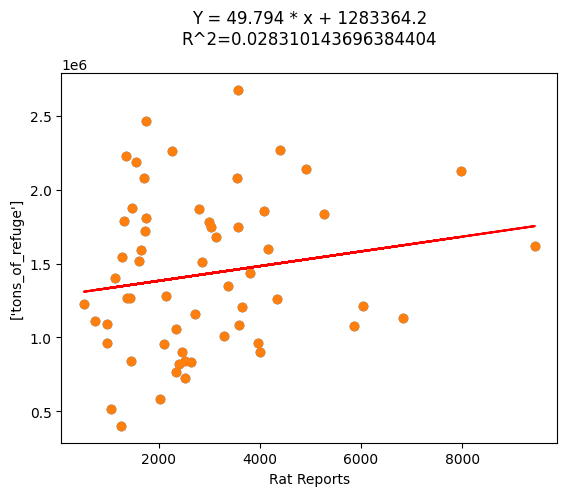

[49.79434272]
1283364.2284225286
0.028310143696384404


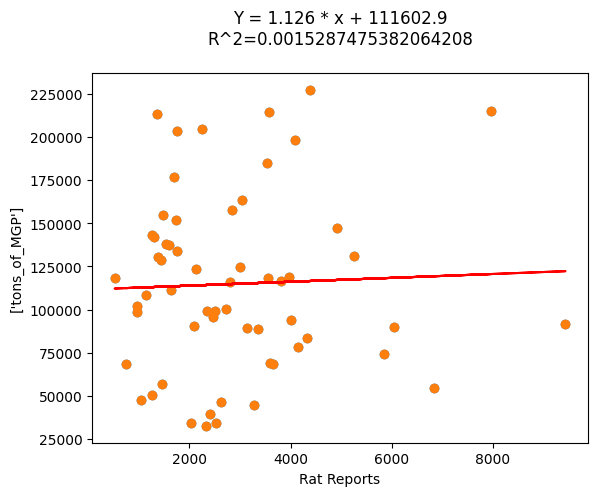

[1.12634825]
111602.86274860674
0.0015287475382064208


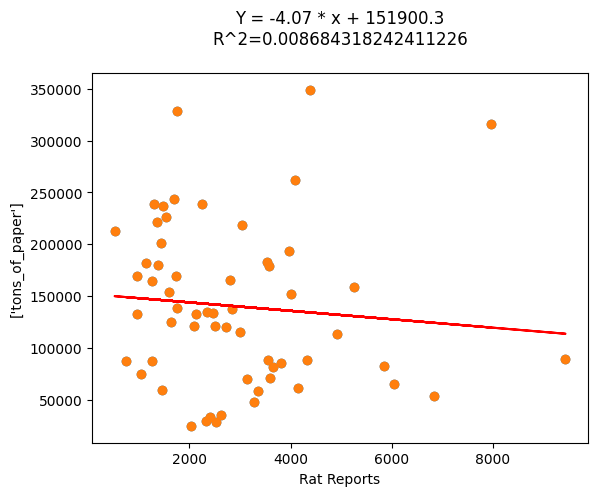

[-4.06960679]
151900.2610051436
0.008684318242411226


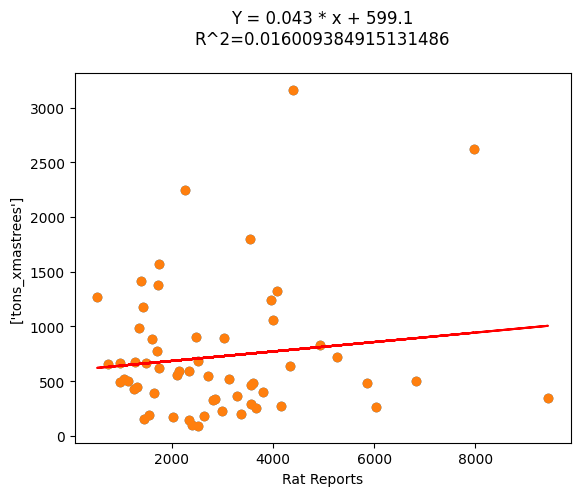

[0.04313309]
599.0702826728844
0.016009384915131486


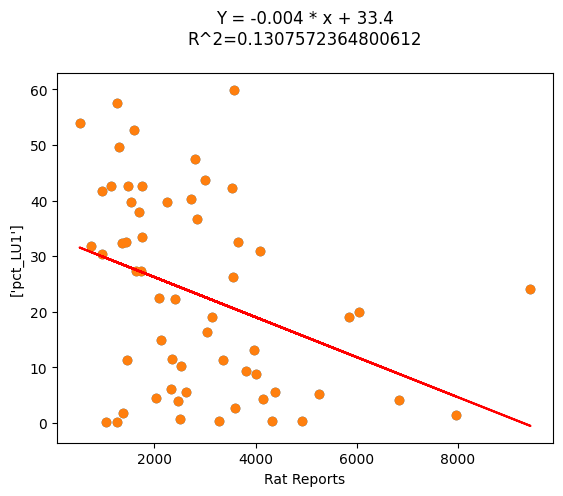

[-0.00360162]
33.42374069608063
0.1307572364800612


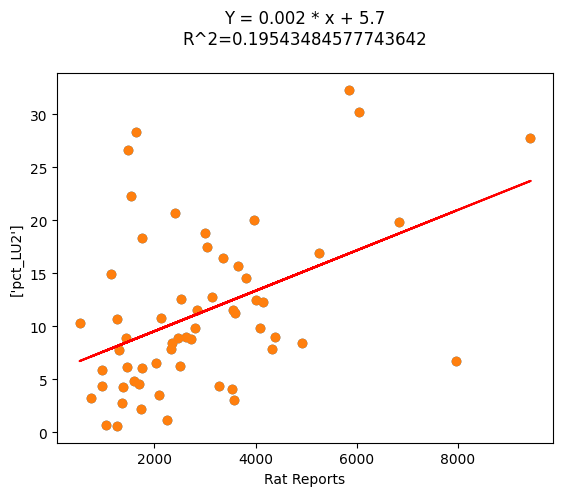

[0.00190677]
5.720035065914443
0.19543484577743642


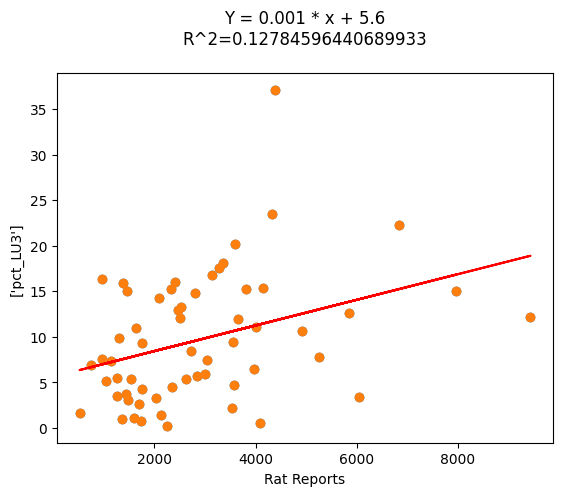

[0.00140806]
5.599177914932682
0.12784596440689933


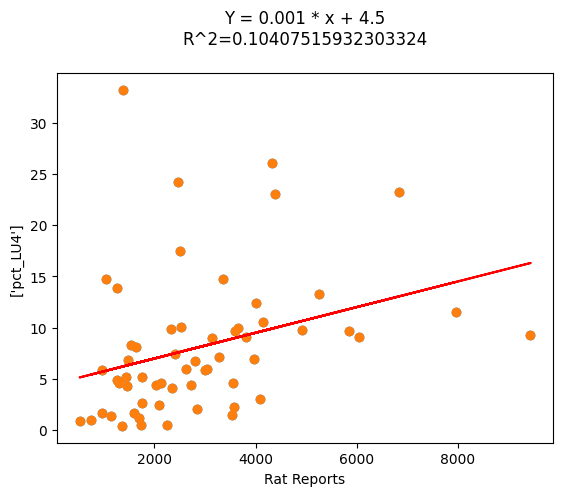

[0.00125325]
4.4766254327441315
0.10407515932303324


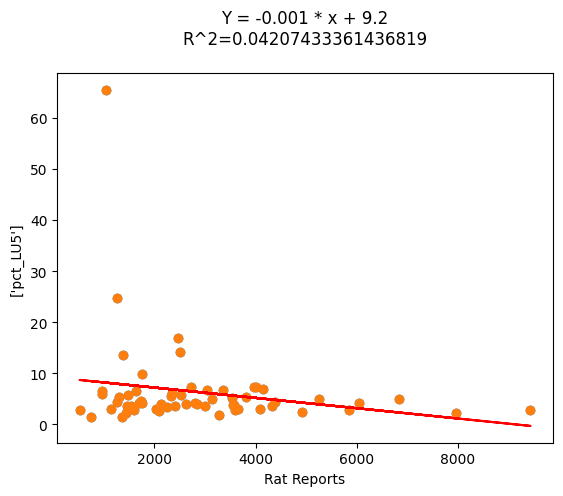

[-0.00100988]
9.231664784512414
0.04207433361436819


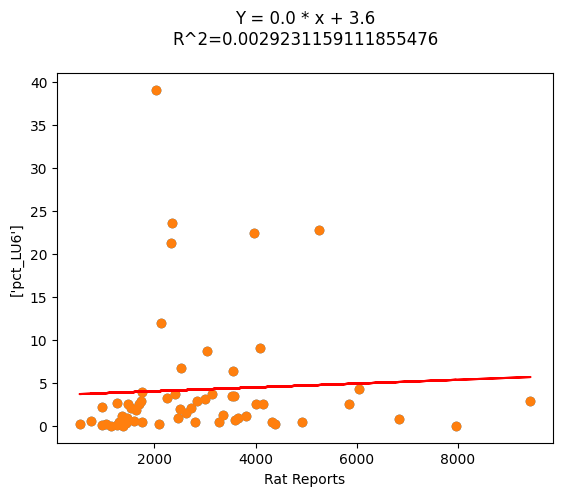

[0.00022246]
3.59092873347047
0.0029231159111855476


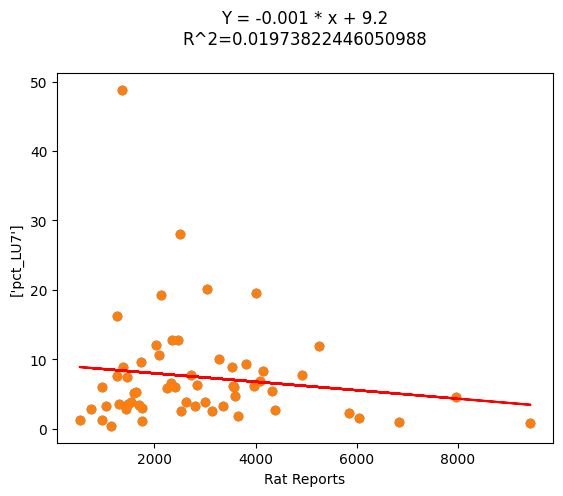

[-0.00060975]
9.200928299339719
0.01973822446050988


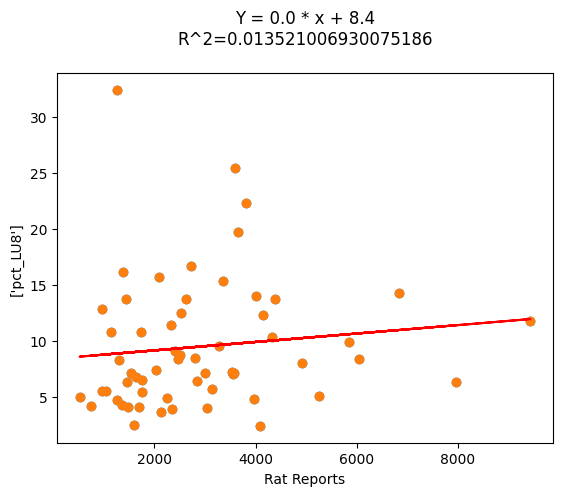

[0.00037634]
8.39073217194562
0.013521006930075186


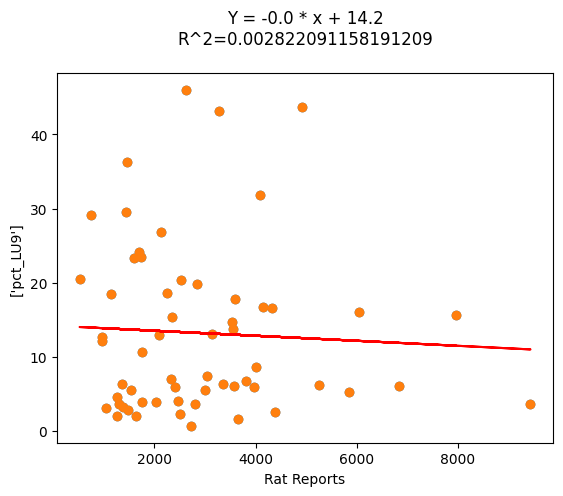

[-0.00033876]
14.212203751538457
0.002822091158191209


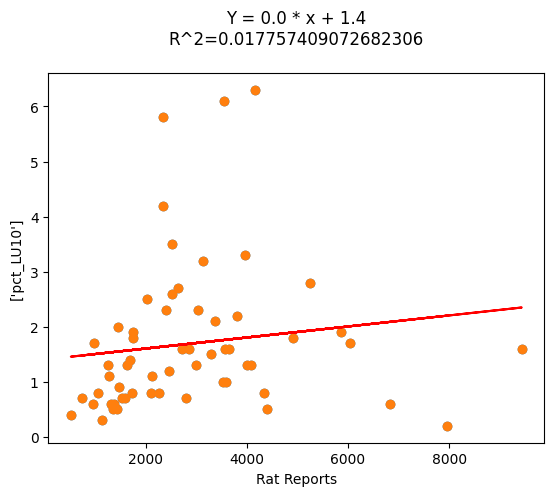

[0.00010015]
1.4046856247328312
0.017757409072682306


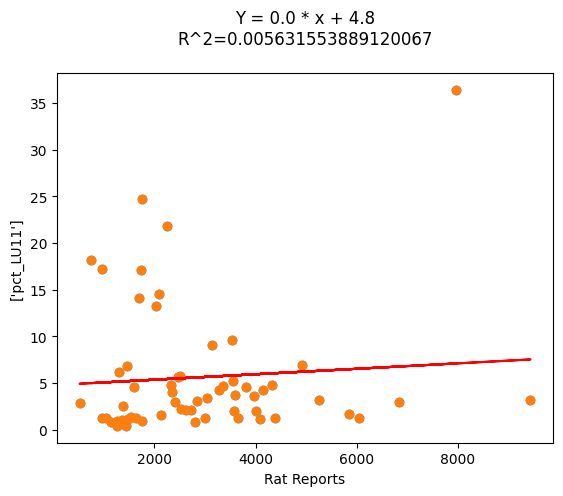

[0.00029175]
4.769775715695724
0.005631553889120067


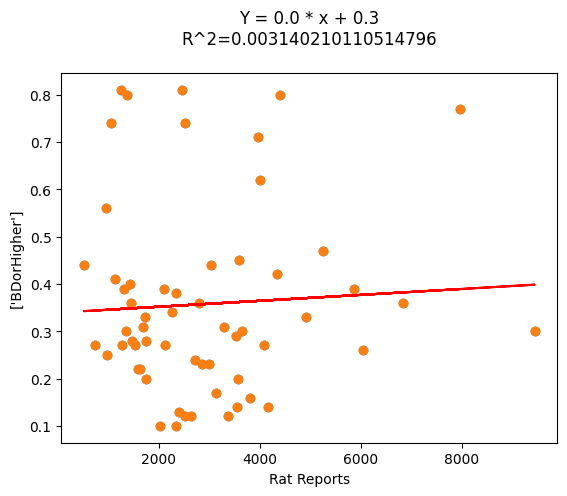

[6.27547797e-06]
0.3392716110473312
0.003140210110514796


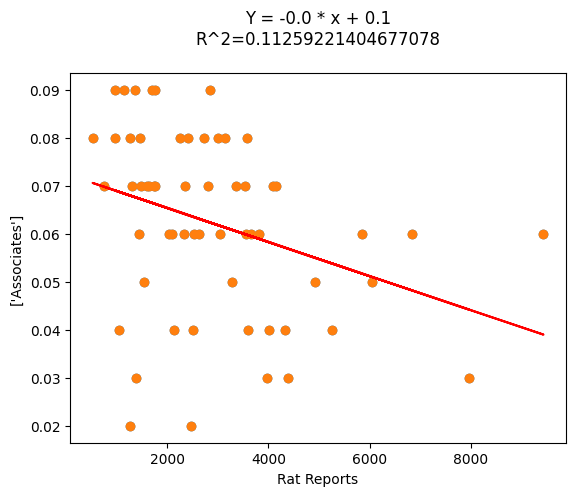

[-3.54526581e-06]
0.07247738987195385
0.11259221404677078


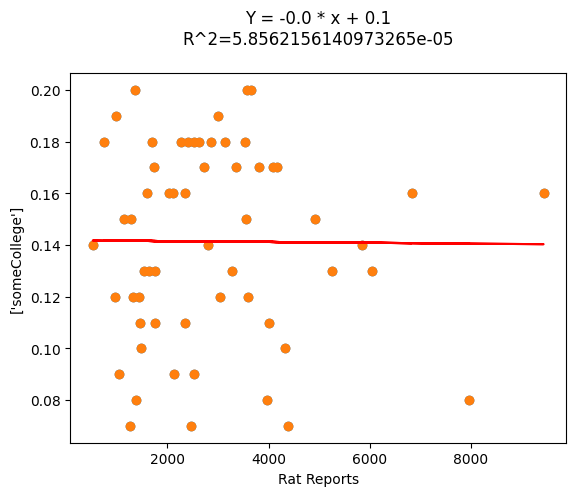

[-1.60752504e-07]
0.14182178478632154
5.8562156140973265e-05


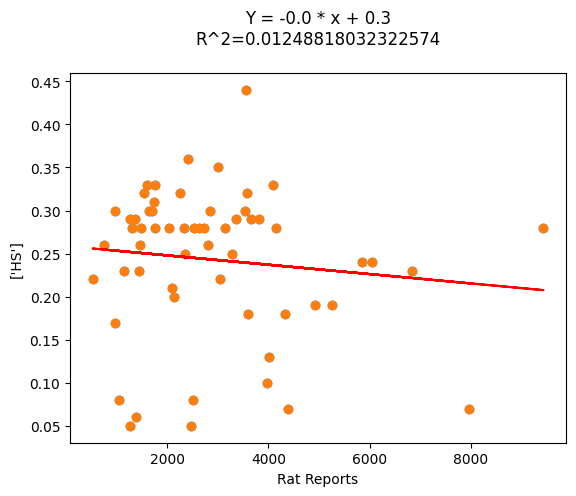

[-5.41805899e-06]
0.2587521069104024
0.01248818032322574


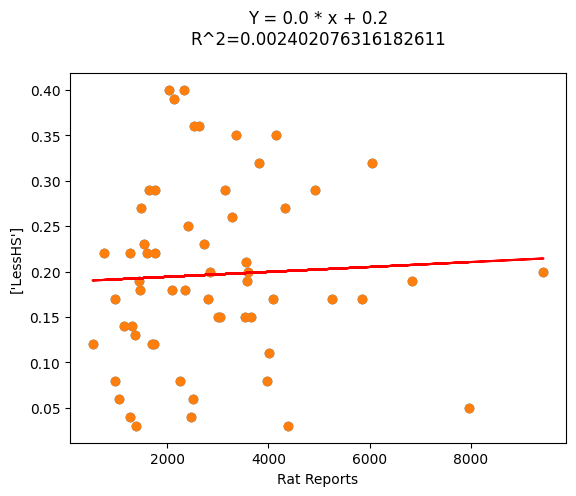

[2.71588925e-06]
0.1887396605303406
0.002402076316182611


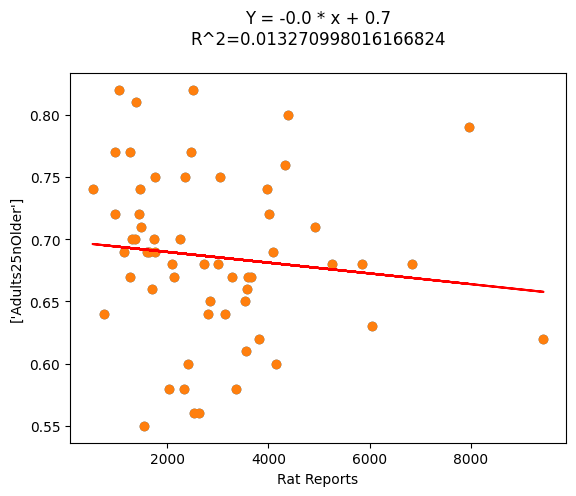

[-4.31386105e-06]
0.6984335533711107
0.013270998016166824


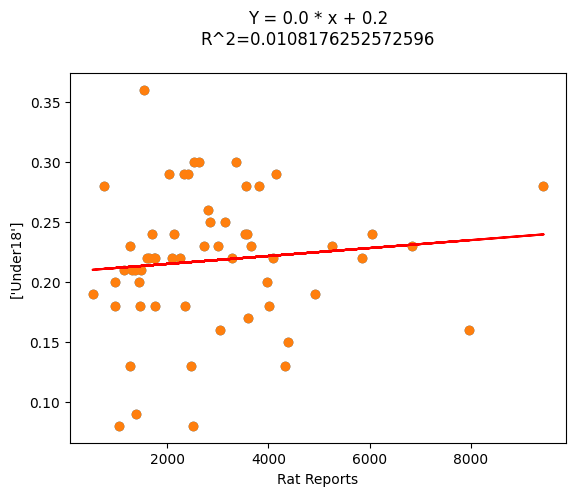

[3.30777038e-06]
0.2083803513290559
0.0108176252572596


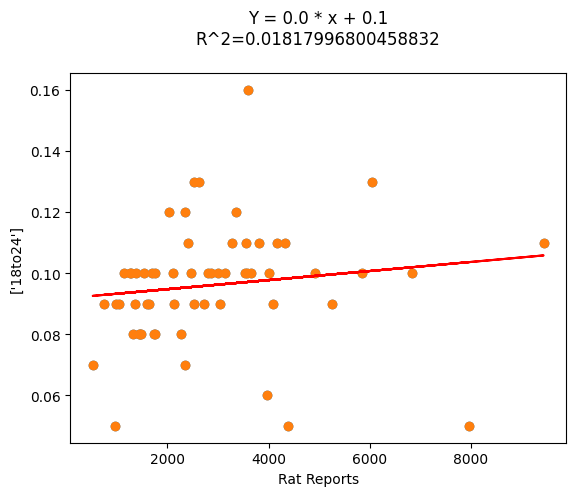

[1.48573534e-06]
0.09179610944171435
0.01817996800458832


<Figure size 640x480 with 0 Axes>

In [6]:
for i in columnList:
    cdf=df
    cdf.dropna(axis='columns')
    # The data in the df column must be reshaped into an array with shape (num_samples, num_features)
    # https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
    plt.scatter(cdf.total_rats, cdf[i])
#     plt.xlabel('Rat Reports')
#     plt.ylabel([i])
    #plt.show()
    X = cdf.total_rats.values.reshape(-1, 1)
    # The shape of X is no samples, with a single feature (column)
    X.shape
    y = cdf[i]
    cdf[i].describe()
    # Create a model with scikit-learn
    model = LinearRegression()
    # Fit the data into the model
    # By convention, X is capitalized and y is lowercase
    model.fit(X, y)
    # The model creates predicted y values based on X values
    y_pred = model.predict(X)
        
    #calculate R-squared of regression model
    r_squared = model.score(X, y)
    
    # Plot the results. The best fit line is red.
    plt.scatter(X, y)
    plt.title(f'Y = {round(model.coef_[0], 3)} * x + {round(model.intercept_, 1)}\nR^2={(r_squared)}\n')
    plt.xlabel('Rat Reports')
    plt.ylabel([i])
    plt.plot(X, y_pred, color='red')
    plt.show()
    
    # The slope
    # The y-intercept
    print((model.coef_))
    print(model.intercept_)
    print(r_squared)
    filename = [i]
    plt.tight_layout()
    #plt.savefig(filename, format='png')


In [ ]:
#plt.savefig('NYCrats_linear_regression.png')